In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle



In [2]:
# Load the dataset
data = pd.read_csv("Crop_recommendation.csv")

In [3]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [8]:
data.isnull().sum()/len(data)*100

N              0.0
P              0.0
K              0.0
temperature    0.0
humidity       0.0
ph             0.0
rainfall       0.0
label          0.0
dtype: float64

In [9]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

# EDA

In [11]:
train_df=data

In [12]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train_df[variable])
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

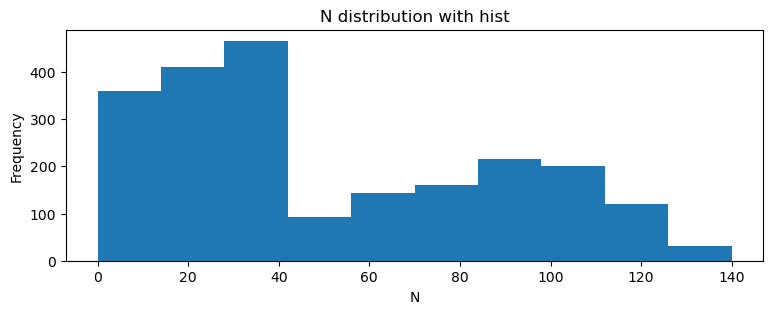

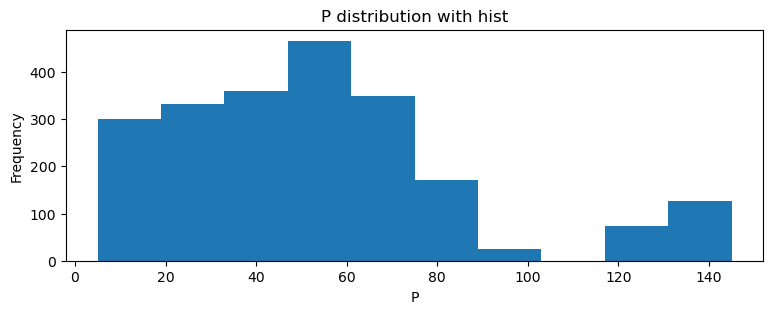

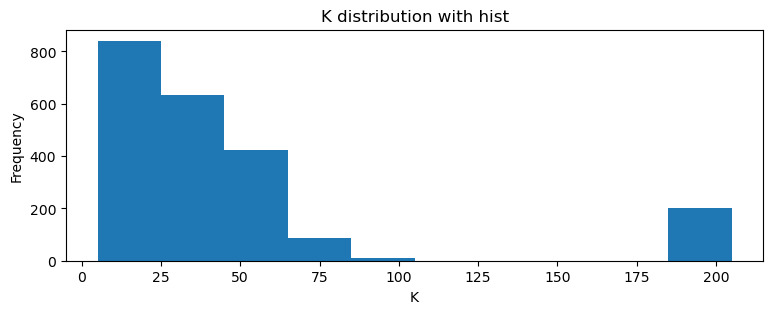

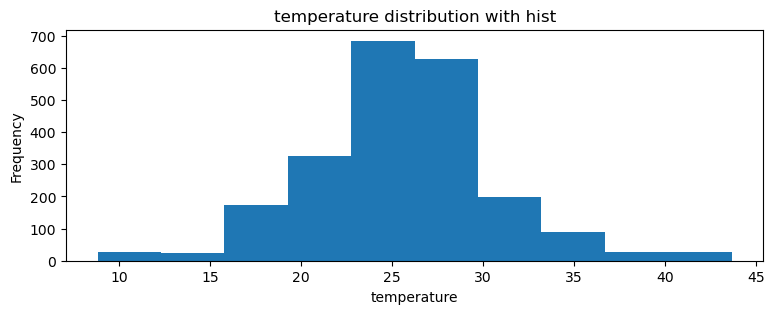

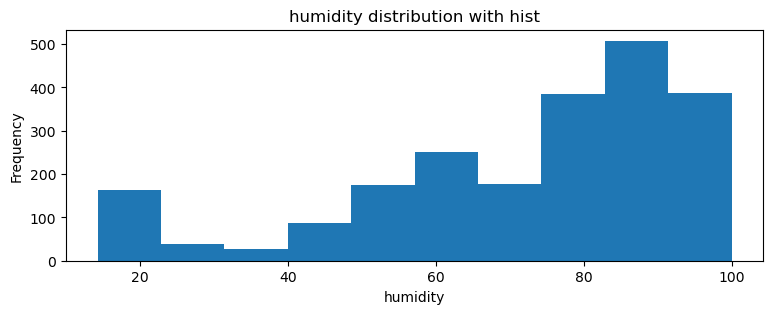

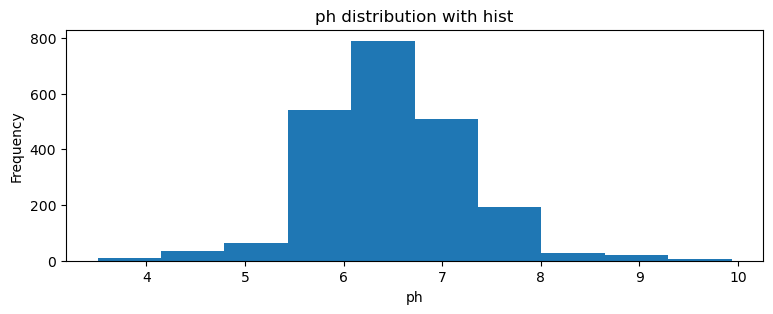

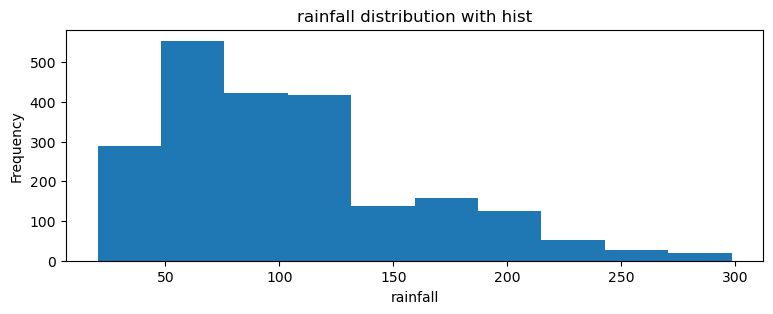

In [13]:
numericVar = ["N", "P","K","temperature","humidity","ph","rainfall"]
for n in numericVar:
    plot_hist(n)

# Find Outlier

In [15]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [16]:
data['N'].describe()

count    2200.000000
mean       50.551818
std        36.917334
min         0.000000
25%        21.000000
50%        37.000000
75%        84.250000
max       140.000000
Name: N, dtype: float64

<Axes: >

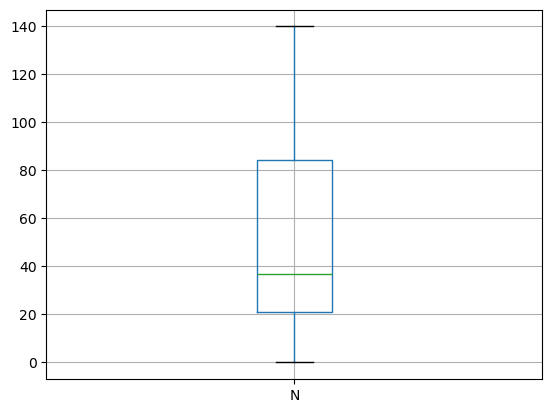

In [17]:
data.boxplot(column=['N'], return_type='axes')

In [18]:
data['P'].describe()

count    2200.000000
mean       53.362727
std        32.985883
min         5.000000
25%        28.000000
50%        51.000000
75%        68.000000
max       145.000000
Name: P, dtype: float64

<Axes: >

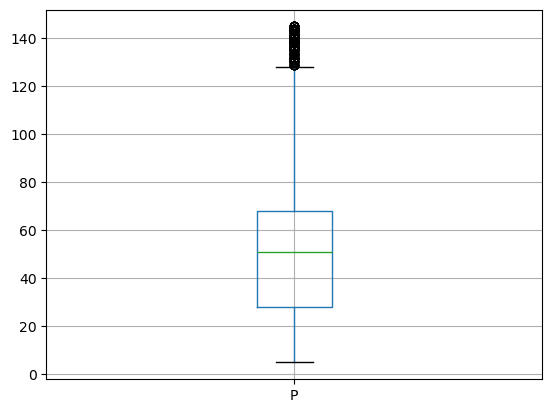

In [19]:
data.boxplot(column=['P'], return_type='axes')

In [20]:
data[['P']]

,P
0,42
1,58
2,55
3,35
4,42
...,...
2195,34
2196,15
2197,33
2198,32


In [21]:
        # 1st quartile
        Q1 = np.percentile(data['P'],25)
        # 3rd quartile
        Q3 = np.percentile(data['P'],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        positive_outlier=Q3+1.5*IQR
        negative_outlier=Q1-1.5*IQR

In [22]:
Q1

28.0

In [23]:
Q3

68.0

In [24]:
IQR

40.0

In [25]:
positive_outlier

128.0

In [26]:
negative_outlier

-32.0

In [27]:
data['P'].max()

145

In [28]:
len(data[data['P']>=128])   # len of outlier

144

In [29]:
new_data=data[data['P']<positive_outlier]

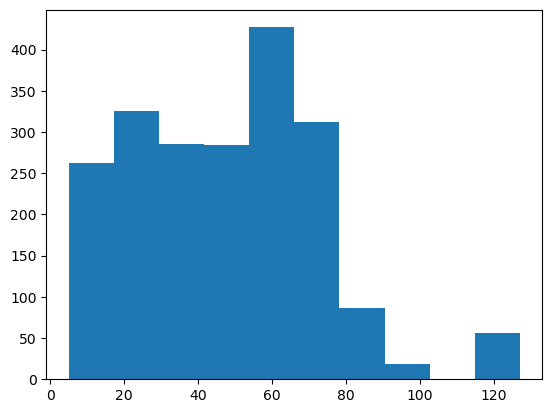

In [30]:
plt.hist(new_data['P'])
plt.show()

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [32]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2056 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2056 non-null   int64  
 1   P            2056 non-null   int64  
 2   K            2056 non-null   int64  
 3   temperature  2056 non-null   float64
 4   humidity     2056 non-null   float64
 5   ph           2056 non-null   float64
 6   rainfall     2056 non-null   float64
 7   label        2056 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 144.6+ KB


In [33]:
new_data['K'].describe()

count    2056.000000
mean       37.519942
std        31.895276
min         5.000000
25%        20.000000
50%        30.000000
75%        46.000000
max       205.000000
Name: K, dtype: float64

<Axes: >

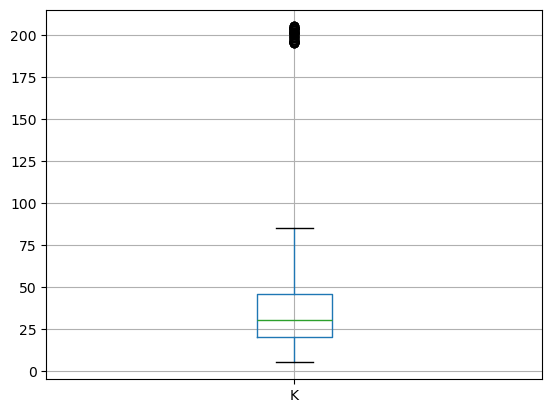

In [34]:
new_data.boxplot(column=['K'], return_type='axes')

In [35]:
new_data[['K']]

,K
0,43
1,41
2,44
3,40
4,42
...,...
2195,32
2196,27
2197,30
2198,34


In [36]:
        # 1st quartile
        Q1 = np.percentile(new_data['K'],25)
        # 3rd quartile
        Q3 = np.percentile(new_data['K'],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        positive_outlier=Q3+1.5*IQR
        negative_outlier=Q1-1.5*IQR

In [37]:
Q1

20.0

In [38]:
Q3

46.0

In [39]:
IQR

26.0

In [40]:
positive_outlier

85.0

In [41]:
negative_outlier

-19.0

In [42]:
new_data['K'].max()

205

In [43]:
len(new_data[new_data['K']>=positive_outlier])   # len of outlier

68

In [44]:
new_data1=new_data[new_data['K']<positive_outlier]

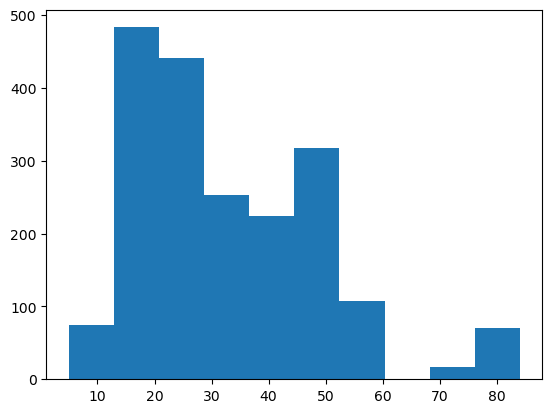

In [45]:
plt.hist(new_data1['K'])
plt.show()

In [46]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2056 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2056 non-null   int64  
 1   P            2056 non-null   int64  
 2   K            2056 non-null   int64  
 3   temperature  2056 non-null   float64
 4   humidity     2056 non-null   float64
 5   ph           2056 non-null   float64
 6   rainfall     2056 non-null   float64
 7   label        2056 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 144.6+ KB


In [47]:
new_data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1988 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1988 non-null   int64  
 1   P            1988 non-null   int64  
 2   K            1988 non-null   int64  
 3   temperature  1988 non-null   float64
 4   humidity     1988 non-null   float64
 5   ph           1988 non-null   float64
 6   rainfall     1988 non-null   float64
 7   label        1988 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 139.8+ KB


In [48]:
new_data1['temperature'].describe()

count    1988.000000
mean       25.895469
std         4.759995
min        10.010813
25%        23.262971
50%        25.899377
75%        28.660397
max        43.675493
Name: temperature, dtype: float64

<Axes: >

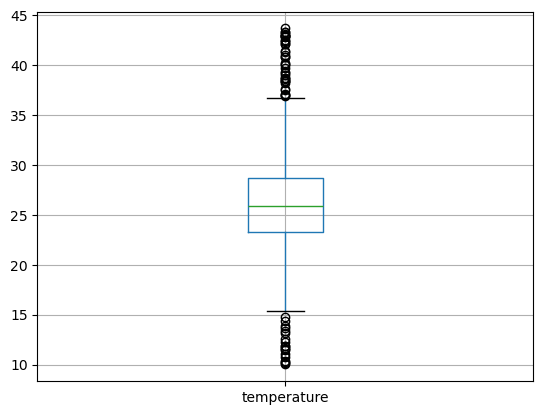

In [49]:
new_data1.boxplot(column=['temperature'], return_type='axes')

In [50]:
new_data1[['temperature']]

,temperature
0,20.879744
1,21.770462
2,23.004459
3,26.491096
4,20.130175
...,...
2195,26.774637
2196,27.417112
2197,24.131797
2198,26.272418


In [51]:
        # 1st quartile
        Q1 = np.percentile(new_data1['temperature'],25)
        # 3rd quartile
        Q3 = np.percentile(new_data1['temperature'],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        positive_outlier=Q3+1.5*IQR
        negative_outlier=Q1-1.5*IQR

In [52]:
Q1

23.262971462499998

In [53]:
Q3

28.660397275

In [54]:
IQR

5.397425812500003

In [55]:
positive_outlier

36.756535993750006

In [56]:
negative_outlier

15.166832743749993

In [57]:
new_data1['temperature'].max()

43.67549305

In [58]:
len(new_data1[new_data1['temperature']>=positive_outlier])   # len of outlier

39

In [59]:
len(new_data1[new_data1['temperature']>=negative_outlier])   # len of outlier

1969

In [60]:
new_data2=new_data1[(new_data1['temperature']>=negative_outlier) & (new_data1['temperature']<=positive_outlier)]

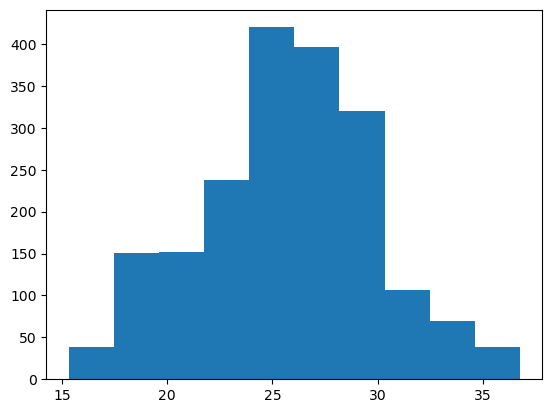

In [61]:
plt.hist(new_data2['temperature'])
plt.show()

In [62]:
new_data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1988 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1988 non-null   int64  
 1   P            1988 non-null   int64  
 2   K            1988 non-null   int64  
 3   temperature  1988 non-null   float64
 4   humidity     1988 non-null   float64
 5   ph           1988 non-null   float64
 6   rainfall     1988 non-null   float64
 7   label        1988 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 139.8+ KB


In [63]:
new_data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1930 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1930 non-null   int64  
 1   P            1930 non-null   int64  
 2   K            1930 non-null   int64  
 3   temperature  1930 non-null   float64
 4   humidity     1930 non-null   float64
 5   ph           1930 non-null   float64
 6   rainfall     1930 non-null   float64
 7   label        1930 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 135.7+ KB


In [64]:
new_data2['humidity'].describe()

count    1930.000000
mean       69.622102
std        22.385849
min        14.258040
25%        57.215855
50%        77.124650
75%        87.734138
max        99.981876
Name: humidity, dtype: float64

<Axes: >

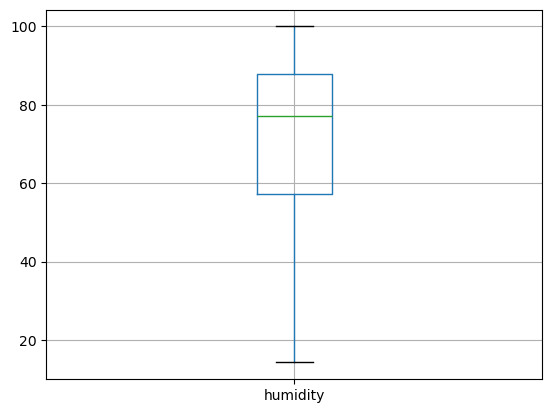

In [65]:
new_data2.boxplot(column=['humidity'], return_type='axes')

In [66]:
new_data2['ph'].describe()

count    1930.000000
mean        6.508354
std         0.795889
min         3.504752
25%         6.019641
50%         6.473400
75%         6.970616
max         9.935091
Name: ph, dtype: float64

<Axes: >

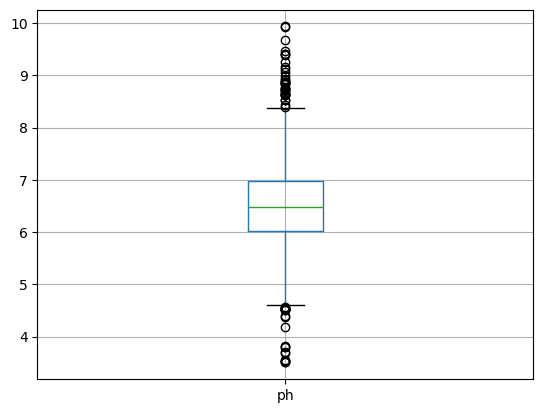

In [67]:
new_data2.boxplot(column=['ph'], return_type='axes')

In [68]:
new_data2[['ph']]

,ph
0,6.502985
1,7.038096
2,7.840207
3,6.980401
4,7.628473
...,...
2195,6.780064
2196,6.086922
2197,6.362608
2198,6.758793


In [69]:
        # 1st quartile
        Q1 = np.percentile(new_data2['ph'],25)
        # 3rd quartile
        Q3 = np.percentile(new_data2['ph'],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        positive_outlier=Q3+1.5*IQR
        negative_outlier=Q1-1.5*IQR

In [70]:
Q1

6.0196406735000005

In [71]:
Q3

6.9706156862499995

In [72]:
IQR

0.950975012749999

In [73]:
positive_outlier

8.397078205374997

In [74]:
negative_outlier

4.593178154375002

In [75]:
new_data2['ph'].max()

9.93509073

In [76]:
len(new_data2[new_data2['ph']>=positive_outlier])   # len of outlier

36

In [77]:
len(new_data2[new_data2['ph']>=negative_outlier])   # len of outlier

1908

In [78]:
new_data3=new_data2[(new_data2['ph']>=negative_outlier) & (new_data2['ph']<=positive_outlier)]

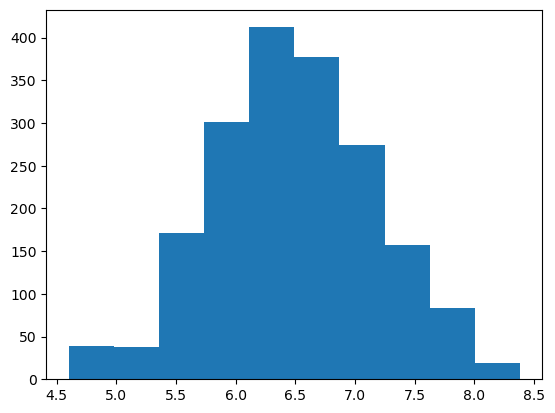

In [79]:
plt.hist(new_data3['ph'])
plt.show()

In [80]:
new_data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1930 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1930 non-null   int64  
 1   P            1930 non-null   int64  
 2   K            1930 non-null   int64  
 3   temperature  1930 non-null   float64
 4   humidity     1930 non-null   float64
 5   ph           1930 non-null   float64
 6   rainfall     1930 non-null   float64
 7   label        1930 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 135.7+ KB


In [81]:
new_data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1872 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1872 non-null   int64  
 1   P            1872 non-null   int64  
 2   K            1872 non-null   int64  
 3   temperature  1872 non-null   float64
 4   humidity     1872 non-null   float64
 5   ph           1872 non-null   float64
 6   rainfall     1872 non-null   float64
 7   label        1872 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 131.6+ KB


In [82]:
new_data3['rainfall'].describe()

count    1872.000000
mean      105.094597
std        57.400728
min        20.211267
25%        61.893756
50%        95.729973
75%       137.347076
max       298.560117
Name: rainfall, dtype: float64

<Axes: >

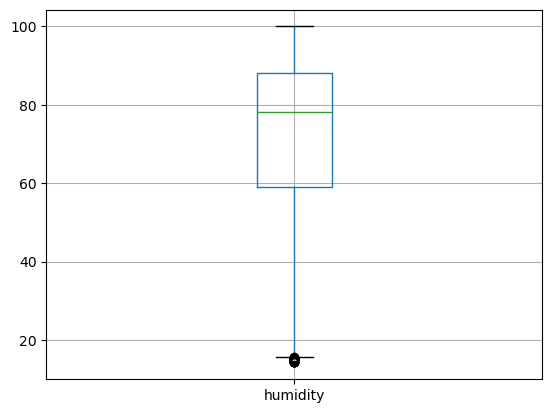

In [83]:
new_data3.boxplot(column=['humidity'], return_type='axes')

In [84]:
new_data3[['rainfall']]

,rainfall
0,202.935536
1,226.655537
2,263.964248
3,242.864034
4,262.717340
...,...
2195,177.774507
2196,127.924610
2197,173.322839
2198,127.175293


In [85]:
        # 1st quartile
        Q1 = np.percentile(new_data3['rainfall'],25)
        # 3rd quartile
        Q3 = np.percentile(new_data3['rainfall'],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        positive_outlier=Q3+1.5*IQR
        negative_outlier=Q1-1.5*IQR

In [86]:
Q1

61.8937556675

In [87]:
Q3

137.34707582499996

In [88]:
IQR

75.45332015749996

In [89]:
positive_outlier

250.5270560612499

In [90]:
negative_outlier

-51.286224568749944

In [91]:
new_data3['rainfall'].max()

298.5601175

In [92]:
len(new_data3[new_data3['rainfall']>=positive_outlier])   # len of outlier

37

In [93]:
len(new_data3[new_data3['rainfall']>=negative_outlier])   # len of outlier

1872

In [94]:
new_data4=new_data3[new_data3['rainfall']>=negative_outlier]

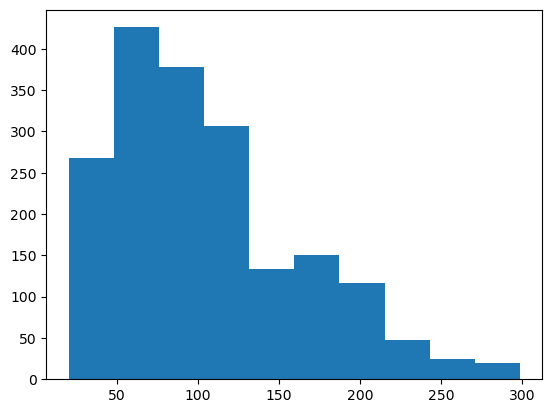

In [95]:
plt.hist(new_data4['rainfall'])
plt.show()

# RandomForest

In [97]:
x=new_data4[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]

In [98]:
y=new_data4['label']

In [99]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xsc=sc.fit_transform(x)

In [100]:
pd.DataFrame(xsc,columns=x.columns)

,N,P,K,temperature,humidity,ph,rainfall
0,0.928130,-0.138555,0.648527,-1.174105,0.525626,0.019232,1.704980
1,0.796060,0.579065,0.523850,-0.957481,0.449717,0.803523,2.118325
2,0.135710,0.444511,0.710865,-0.657372,0.539969,1.979144,2.768468
3,0.505506,-0.452513,0.461511,0.190582,0.442443,0.718961,2.400775
4,0.611162,-0.138555,0.586188,-1.356401,0.507682,1.668814,2.746740
...,...,...,...,...,...,...,...
1867,1.377168,-0.497364,-0.037197,0.259539,-0.177471,0.425335,1.266523
1868,1.165856,-1.349537,-0.348889,0.415790,-0.618418,-0.590575,0.397837
1869,1.667722,-0.542216,-0.161874,-0.383202,-0.140856,-0.186514,1.188948
1870,1.641308,-0.587067,0.087480,0.137399,-0.821776,0.394158,0.384779


In [101]:
pd.DataFrame(y)

,label
0,rice
1,rice
2,rice
3,rice
4,rice
...,...
2195,coffee
2196,coffee
2197,coffee
2198,coffee


In [102]:
from sklearn.model_selection import train_test_split

In [103]:
xtrain,xtest,ytrain,ytest=train_test_split(xsc,y,test_size=0.20,random_state=42)

In [104]:
from sklearn.ensemble import RandomForestClassifier
classifier =RandomForestClassifier(n_estimators=10, criterion='gini',random_state=42)
classifier.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=10, random_state=42)

In [105]:
ypred=classifier.predict(xtest)

In [106]:
ypred

array(['jute', 'watermelon', 'papaya', 'chickpea', 'pigeonpeas', 'mango',
       'chickpea', 'pigeonpeas', 'kidneybeans', 'chickpea', 'pomegranate',
       'mango', 'muskmelon', 'kidneybeans', 'coconut', 'mungbean',
       'orange', 'mothbeans', 'banana', 'watermelon', 'kidneybeans',
       'mothbeans', 'jute', 'pomegranate', 'mothbeans', 'lentil',
       'muskmelon', 'kidneybeans', 'coconut', 'mango', 'lentil',
       'pigeonpeas', 'coffee', 'pigeonpeas', 'mango', 'banana', 'papaya',
       'coffee', 'orange', 'watermelon', 'blackgram', 'maize', 'mungbean',
       'watermelon', 'orange', 'kidneybeans', 'banana', 'pomegranate',
       'cotton', 'muskmelon', 'jute', 'coconut', 'kidneybeans', 'banana',
       'jute', 'mungbean', 'papaya', 'blackgram', 'watermelon', 'jute',
       'watermelon', 'pigeonpeas', 'orange', 'cotton', 'chickpea',
       'maize', 'lentil', 'rice', 'orange', 'muskmelon', 'coconut',
       'jute', 'coconut', 'pigeonpeas', 'banana', 'maize', 'banana',
       'muskme

In [107]:
from sklearn.metrics import confusion_matrix

In [108]:
cm=confusion_matrix(ytest,ypred)

In [109]:
cm

array([[19,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0, 13,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0, 19,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0, 26,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0, 23,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 22,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 24,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 19,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 17,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0

In [110]:
from sklearn.metrics import accuracy_score

In [111]:
score=accuracy_score(ytest,ypred)

In [112]:
score

0.984

In [113]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        19
   blackgram       1.00      1.00      1.00        13
    chickpea       1.00      1.00      1.00        19
     coconut       1.00      1.00      1.00        26
      coffee       1.00      1.00      1.00        23
      cotton       1.00      1.00      1.00        18
        jute       0.85      1.00      0.92        22
 kidneybeans       1.00      1.00      1.00        24
      lentil       0.95      1.00      0.97        19
       maize       1.00      1.00      1.00        17
       mango       1.00      1.00      1.00        12
   mothbeans       1.00      0.85      0.92        13
    mungbean       1.00      1.00      1.00        25
   muskmelon       1.00      1.00      1.00        22
      orange       1.00      1.00      1.00        16
      papaya       1.00      1.00      1.00        12
  pigeonpeas       0.96      1.00      0.98        22
 pomegranate       1.00    

In [114]:
import seaborn as sns

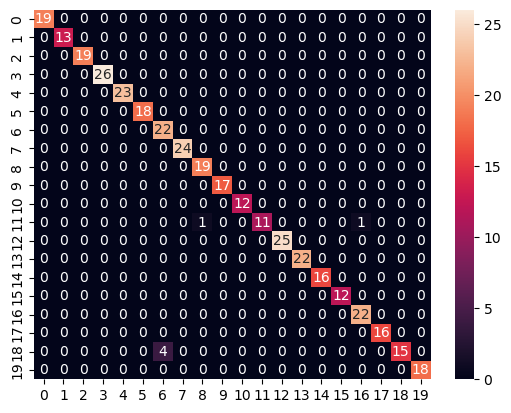

In [115]:
x1=sns.heatmap(cm,annot=True)

In [116]:
import pickle

In [117]:
# Save the model
with open("classifier.pkl", "wb") as f:
    pickle.dump(classifier, f)

print("Model trained and saved successfully!")

Model trained and saved successfully!


In [118]:
import tkinter as tk
from tkinter import messagebox
import pickle

# Load the trained model
with open("classifier.pkl", "rb") as f:
    model = pickle.load(f)

# Login credentials
USER_CREDENTIALS = {"admin": "password123"}

# Function for login validation
def validate_login():
    username = username_entry.get()
    password = password_entry.get()
    if username in USER_CREDENTIALS and USER_CREDENTIALS[username] == password:
        login_window.destroy()
        open_prediction_window()
    else:
        messagebox.showerror("Login Failed", "Invalid username or password!")

# Function for crop prediction
def predict_crop():
    try:
        n = float(n_entry.get())
        p = float(p_entry.get())
        k = float(k_entry.get())
        temp = float(temp_entry.get())
        humidity = float(humidity_entry.get())
        ph = float(ph_entry.get())
        rainfall = float(rainfall_entry.get())
        
        # Make prediction
        prediction = model.predict([[n, p, k, temp, humidity, ph, rainfall]])
        result_label.config(text=f"Recommended Crop: {prediction[0]}")
    except Exception as e:
        messagebox.showerror("Error", f"Invalid input: {e}")

# Function to open prediction window
def open_prediction_window():
    prediction_window = tk.Tk()
    prediction_window.title("Crop Prediction System")
    
    # Input labels and fields
    tk.Label(prediction_window, text="Nitrogen (N):").grid(row=0, column=0)
    tk.Label(prediction_window, text="Phosphorus (P):").grid(row=1, column=0)
    tk.Label(prediction_window, text="Potassium (K):").grid(row=2, column=0)
    tk.Label(prediction_window, text="Temperature (°C):").grid(row=3, column=0)
    tk.Label(prediction_window, text="Humidity (%):").grid(row=4, column=0)
    tk.Label(prediction_window, text="pH:").grid(row=5, column=0)
    tk.Label(prediction_window, text="Rainfall (mm):").grid(row=6, column=0)
    
    global n_entry, p_entry, k_entry, temp_entry, humidity_entry, ph_entry, rainfall_entry, result_label
    n_entry = tk.Entry(prediction_window)
    p_entry = tk.Entry(prediction_window)
    k_entry = tk.Entry(prediction_window)
    temp_entry = tk.Entry(prediction_window)
    humidity_entry = tk.Entry(prediction_window)
    ph_entry = tk.Entry(prediction_window)
    rainfall_entry = tk.Entry(prediction_window)
    
    n_entry.grid(row=0, column=1)
    p_entry.grid(row=1, column=1)
    k_entry.grid(row=2, column=1)
    temp_entry.grid(row=3, column=1)
    humidity_entry.grid(row=4, column=1)
    ph_entry.grid(row=5, column=1)
    rainfall_entry.grid(row=6, column=1)
    
    # Predict button
    tk.Button(prediction_window, text="Predict Crop", command=predict_crop).grid(row=7, column=1)
    
    # Result label
    result_label = tk.Label(prediction_window, text="Recommended Crop: ")
    result_label.grid(row=8, column=1)
    
    prediction_window.mainloop()

# Login Window
login_window = tk.Tk()
login_window.title("Login Page")

# Login fields
tk.Label(login_window, text="Username:").grid(row=0, column=0)
tk.Label(login_window, text="Password:").grid(row=1, column=0)

username_entry = tk.Entry(login_window)
password_entry = tk.Entry(login_window, show="*")
username_entry.grid(row=0, column=1)
password_entry.grid(row=1, column=1)

# Login button
tk.Button(login_window, text="Login", command=validate_login).grid(row=2, column=1)

login_window.mainloop()